In [489]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [490]:
df = pd.read_csv("../data/dataset_final.csv")
df = df.rename(columns={'Unnamed: 0' : 'date'})
df.head()

,date,Y_Aave_APY,X_Aave_Utilization,totalValueLockedUSD,Y_SOFR,X_USDC_Depeg_Risk,X_BTC_Price,X_ETH_Price,X_VIX,X_DGS2,X_Gas_Price_Gwei,Y_Target_Spread,X_ETH_Returns,X_ETH_Vol_7D,X_BTC_Returns,X_BTC_Vol_7D,X_Gas_MA_7D,X_VIX_Pct_Change
0,2023-02-03,1.787551,0.668511,1.607209e+07,4.55,0.386207,23426.40,1663.67,18.33,4.30,33.686520,-2.762449,0.011091,0.083008,-0.005205,0.061984,27.292499,-0.021356
1,2023-02-04,1.888926,0.687208,1.765850e+07,4.55,0.373452,23318.95,1665.36,18.33,4.30,26.322246,-2.661074,0.001016,0.079483,-0.004587,0.062278,28.365183,0.000000
2,2023-02-05,2.518026,0.793438,1.839142e+07,4.55,0.415779,22938.03,1629.63,18.33,4.30,23.794847,-2.031974,-0.021455,0.071024,-0.016335,0.054399,28.459341,0.000000
3,2023-02-06,1.787604,0.668528,2.093404e+07,4.55,0.351516,22751.79,1613.52,19.43,4.44,28.478692,-2.762396,-0.009886,0.048659,-0.008119,0.039010,29.409754,0.060011
4,2023-02-07,1.972380,0.702233,2.167537e+07,4.55,0.346042,23260.42,1672.78,18.66,4.47,36.817070,-2.577620,0.036727,0.058386,0.022356,0.043533,30.348589,-0.039629


[]

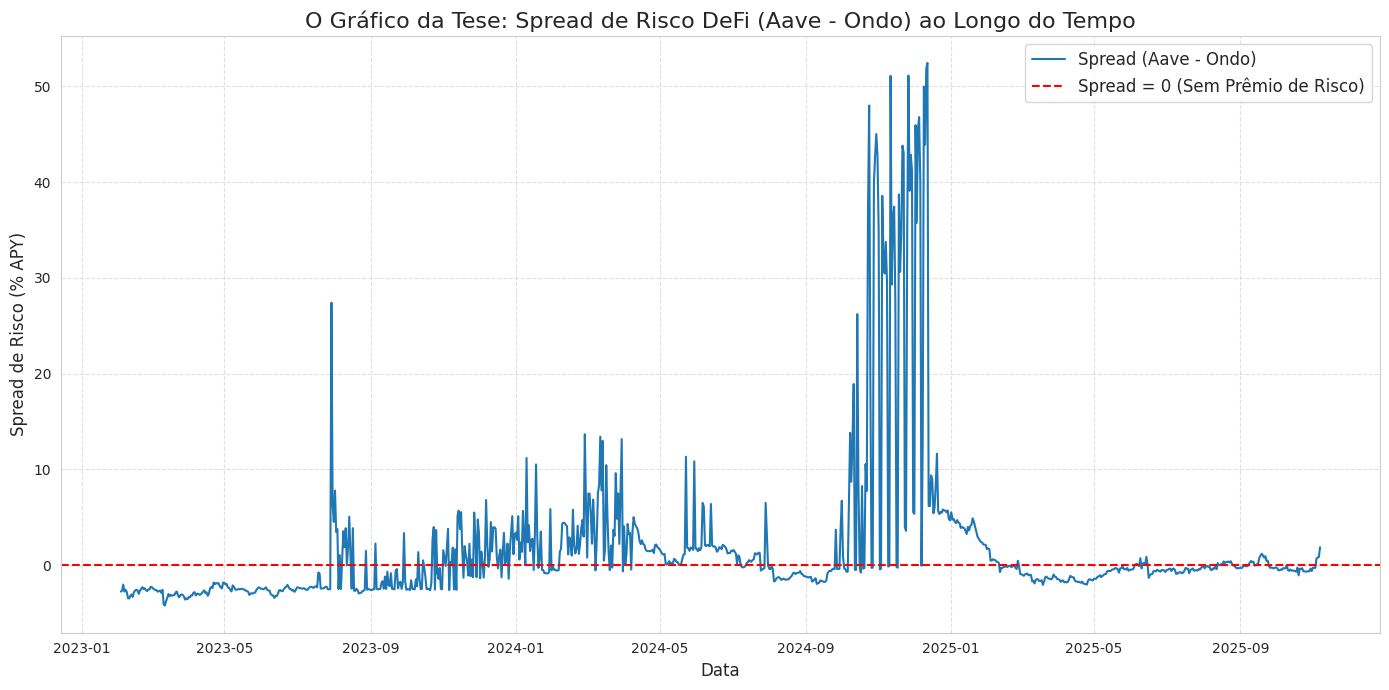

In [491]:
# --- 2. Preparar os Dados ---
# Converter a coluna 'date' de string para datetime e defini-la como índice
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')

# --- 3. Gerar "O Gráfico da Tese" (Plot de Série Temporal) ---
plt.figure(figsize=(14, 7))
ax = sns.lineplot(x=df.index, y=df['Y_Target_Spread'], label='Spread (Aave - Ondo)')

# Adicionar uma linha de base em 0
ax.axhline(0, ls='--', color='red', lw=1.5, label='Spread = 0 (Sem Prêmio de Risco)')

# Melhorar a formatação
plt.title('O Gráfico da Tese: Spread de Risco DeFi (Aave - Ondo) ao Longo do Tempo', fontsize=16)
plt.ylabel('Spread de Risco (% APY)', fontsize=12)
plt.xlabel('Data', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Plotar o gráfico
plt.plot()

# Features old

In [492]:
# --- 4. Engenharia de Features ---
df['Y_Target_Diff'] = df['Y_Target_Spread'].diff()
df['Lag_1'] = df['Y_Target_Spread'].shift(1)
df['Lag_2'] = df['Y_Target_Spread'].shift(2)
df['Diff_Lag_1'] = df['Y_Target_Diff'].shift(1)

# --- APLICANDO SUGESTÃO 2: Transformações ---
df['X_BTC_Ret'] = df['X_BTC_Price'].pct_change()
df['X_Gas_Change'] = df['X_Gas_Price_Gwei'].diff()

df = df.dropna()

# Seleção de Features (Novas features engenheiradas)
features = [
    'X_Aave_Utilization', 'totalValueLockedUSD', 'X_USDC_Depeg_Risk', 'X_VIX',
    'X_BTC_Vol_7D', 'X_ETH_Vol_7D', 'X_ETH_Returns', 'X_DGS2',
    'Lag_1', 'Lag_2', 'Diff_Lag_1', 'X_BTC_Ret', 'X_Gas_Change'
]

# A lista 'features_sem' estava causando o KeyError
# features_sem = [
#     'totalValueLockedUSD', 'X_USDC_Depeg_Risk', 'X_VIX',
#     'X_BTC_Vol_7D', 'X_ETH_Vol_7D', 'X_ETH_Returns', 'X_DGS2',
#     'Lag_1', 'Lag_2', 'Diff_Lag_1', 'X_BTC_Ret', 'X_Gas_Change'
# ]

# <-- CORREÇÃO: Usar 'features' para que X_Aave_Utilization esteja incluída
X = df[features] 
#Y = df['Y_Target_Diff']
Y = df['Y_Target_Spread']

# --- 5. Divisão Treino/Teste (Time Series) ---
# NUNCA usar shuffle=True em séries temporais
split_point = int(len(df) * 0.8)

X_train, X_test = X.iloc[:split_point], X.iloc[split_point:]
Y_train, Y_test = Y.iloc[:split_point], Y.iloc[split_point:]

print(f"--- Divisão dos Dados (Time Series Split) ---")
print(f"Total de amostras: {len(df)}")
print(f"Amostras de Treino: {len(Y_train)} (80%)")
print(f"Amostras de Teste:  {len(Y_test)} (20%)")

df[features].to_csv('X.csv')
df['Y_Target_Spread'].to_csv('Y.csv')

--- Divisão dos Dados (Time Series Split) ---
Total de amostras: 1007
Amostras de Treino: 805 (80%)
Amostras de Teste:  202 (20%)


# Features

In [ ]:
# --- 4. Engenharia de Features ---
df['Y_Target_Diff'] = df['Y_Target_Spread'].diff()
df['Lag_1'] = df['Y_Target_Spread'].shift(1)
df['Lag_2'] = df['Y_Target_Spread'].shift(2)
df['Diff_Lag_1'] = df['Y_Target_Diff'].shift(1)

# --- Transformações ---
df['X_BTC_Ret'] = df['X_BTC_Price'].pct_change()
df['X_Gas_Change'] = df['X_Gas_Price_Gwei'].diff()

# --- NOVAS FEATURES (CORRIGIDAS COM .shift(1) PARA EVITAR VAZAMENTO) ---

# Criar features rolantes (que incluem o dia atual)
spread_ma_3d = df['Y_Target_Spread'].rolling(3).mean()
spread_ma_7d = df['Y_Target_Spread'].rolling(7).mean()
spread_std_7d = df['Y_Target_Spread'].rolling(7).std()
vix_ma_7d = df['X_VIX'].rolling(7).mean()

if 'X_Gas_MA_7D' not in df.columns:
    gas_ma_7d = df['X_Gas_Price_Gwei'].rolling(7).mean()
else:
    gas_ma_7d = df['X_Gas_MA_7D']

# --- APLICAR O .shift(1) ---
# Isso garante que estamos usando a média móvel de "ontem" para prever "hoje"
df['Spread_MA_3D'] = spread_ma_3d.shift(1)
df['Spread_MA_7D'] = spread_ma_7d.shift(1)
df['Spread_Std_7D'] = spread_std_7d.shift(1)
df['VIX_MA_7D'] = vix_ma_7d.shift(1)
df['Gas_MA_7D'] = gas_ma_7d.shift(1) 

# Remover NaNs criados pelos rolling windows E pelos shifts
df = df.dropna()

# Seleção de Features (Features agora corrigidas)
features = [
    'X_Aave_Utilization', 'totalValueLockedUSD', 'X_USDC_Depeg_Risk', 'X_VIX',
    'X_BTC_Vol_7D', 'X_ETH_Vol_7D', 'X_ETH_Returns', 'X_DGS2',
    'Lag_1', 'Lag_2', 'Diff_Lag_1', 'X_BTC_Ret', 'X_Gas_Change',
    'Spread_MA_3D', 'Spread_MA_7D', 'Spread_Std_7D', 'VIX_MA_7D', 'Gas_MA_7D'
]

# Garantir que todas as features selecionadas realmente existem no DataFrame
features = [f for f in features if f in df.columns]

X = df[features] 
Y = df['Y_Target_Spread']

# --- 5. Divisão Treino/Teste (Time Series) ---
split_point = int(len(df) * 0.8)

X_train, X_test = X.iloc[:split_point], X.iloc[split_point:]
Y_train, Y_test = Y.iloc[:split_point], Y.iloc[split_point:]

print(f"--- Divisão dos Dados (Time Series Split) ---\n")
print(f"Total de amostras (pós-dropna): {len(df)}")
print(f"Amostras de Treino: {len(Y_train)}")
print(f"Amostras de Teste:  {len(Y_test)}")

df[features].to_csv('X_corrigido.csv')
df['Y_Target_Spread'].to_csv('Y_corrigido.csv')

--- Divisão dos Dados (Time Series Split) ---

Total de amostras (pós-dropna): 1000
Amostras de Treino: 800
Amostras de Teste:  200


In [494]:
# --- 5. Método Embutido (Embedded): Random Forest Importance ---
# Modelos de Árvore (como Random Forest) calculam a importância de cada feature.
# Vantagem: Robusto, captura relações não-lineares, não exige scaling.
from sklearn.ensemble import RandomForestRegressor

print("--- Método Embutido (Random Forest Importance) ---")
RF = RandomForestRegressor(n_estimators=100, random_state=42)

# Treinar o modelo (pode usar dados não-escalados)
RF.fit(X_train, Y_train)

# Obter as importâncias
importances = RF.feature_importances_
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': importances   
}).sort_values(by='importance', ascending=False)

print("Importância das features (Random Forest):")
print(importance_df)

# Você pode então selecionar as "N" features com maior importância
# Por exemplo, as 8 melhores
selected_features_rf = importance_df.head(10)['feature'].to_list()
print(f"\nFeatures selecionadas (Embedded/RF): {selected_features_rf}")

# Aplicar a seleção
X_train = X_train[selected_features_rf]
X_test = X_test[selected_features_rf]

--- Método Embutido (Random Forest Importance) ---


Importância das features (Random Forest):
                feature  importance
0    X_Aave_Utilization    0.935226
13         Spread_MA_3D    0.025833
14         Spread_MA_7D    0.015747
1   totalValueLockedUSD    0.008343
8                 Lag_1    0.002849
7                X_DGS2    0.002501
17            Gas_MA_7D    0.002110
9                 Lag_2    0.001435
16            VIX_MA_7D    0.000910
3                 X_VIX    0.000771
15        Spread_Std_7D    0.000722
4          X_BTC_Vol_7D    0.000713
5          X_ETH_Vol_7D    0.000617
2     X_USDC_Depeg_Risk    0.000591
10           Diff_Lag_1    0.000588
12         X_Gas_Change    0.000375
6         X_ETH_Returns    0.000354
11            X_BTC_Ret    0.000315

Features selecionadas (Embedded/RF): ['X_Aave_Utilization', 'Spread_MA_3D', 'Spread_MA_7D', 'totalValueLockedUSD', 'Lag_1', 'X_DGS2', 'Gas_MA_7D', 'Lag_2', 'VIX_MA_7D', 'X_VIX']


In [495]:
"""# --- 6. Clusterização por Regimes (Método Corrigido) ---

def regime_based_clustering(X, volatility_threshold=0.7, utilization_threshold=0.7, 
                            vol_thresh=None, util_thresh=None): # <-- CORREÇÃO: Adicionados thresholds opcionais
    
    Clusterização baseada em regimes de mercado.
    Se vol_thresh e util_thresh não forem fornecidos, eles são "aprendidos" dos dados X.
    Se forem fornecidos, eles são "aplicados" aos dados X.
    
    regimes = np.zeros(len(X), dtype=int)    
    
    # --- "Fit" (Aprender) thresholds se não forem fornecidos ---
    if vol_thresh is None:
        vol_thresh = X['X_VIX'].quantile(volatility_threshold)
        print(f"Threshold VIX (Aprendido): {vol_thresh:.2f}")
    else:
        print(f"Threshold VIX (Aplicado): {vol_thresh:.2f}")

    if util_thresh is None:
        util_thresh = X['X_Aave_Utilization'].quantile(utilization_threshold)
        print(f"Threshold Aave Util (Aprendido): {util_thresh:.2f}")
    else:
        print(f"Threshold Aave Util (Aplicado): {util_thresh:.2f}")

    # Definir regimes
    normal_mask = (X['X_VIX'] <= vol_thresh) & (X['X_Aave_Utilization'] <= util_thresh)
    stress_mask = ((X['X_VIX'] > vol_thresh) | (X['X_Aave_Utilization'] > util_thresh)) & \
                  ~((X['X_VIX'] > vol_thresh) & (X['X_Aave_Utilization'] > util_thresh))
    crisis_mask = (X['X_VIX'] > vol_thresh) & (X['X_Aave_Utilization'] > util_thresh)
    
    regimes[normal_mask] = 0
    regimes[stress_mask] = 1
    regimes[crisis_mask] = 2
    
    # Estatísticas por regime
    regime_stats = pd.DataFrame({
        'Regime': ['Normal', 'Estresse', 'Crisis'],
        'Samples': [np.sum(normal_mask), np.sum(stress_mask), np.sum(crisis_mask)],
        'Avg_VIX': [X[normal_mask]['X_VIX'].mean(), X[stress_mask]['X_VIX'].mean(), X[crisis_mask]['X_VIX'].mean()],
        'Avg_Utilization': [X[normal_mask]['X_Aave_Utilization'].mean(), X[stress_mask]['X_Aave_Utilization'].mean(), X[crisis_mask]['X_Aave_Utilization'].mean()]
    })
    
    print("\nDistribuição dos Regimes:")
    print(regime_stats)
    
    # <-- CORREÇÃO: Retornar os regimes e os thresholds aprendidos
    return regimes, vol_thresh, util_thresh


# --- 7. Treino e Avaliação dos Modelos por Regime ---

print("=== MÉTODO 2: Clusterização por Regimes ===\n")

# --- CORREÇÃO: Aplicar lógica de Fit/Transform ---
# 1. "Fit": Aprender os regimes e thresholds *APENAS* no treino
print("--- Definindo Regimes (TREINO) ---")
train_regimes, v_thresh, u_thresh = regime_based_clustering(X_train, 
                                                            volatility_threshold=0.7, 
                                                            utilization_threshold=0.7)

# 2. "Transform": Aplicar os thresholds *aprendidos no treino* aos dados de teste
print("\n--- Aplicando Regimes (TESTE) ---")
test_regimes, _, _ = regime_based_clustering(X_test, 
                                             vol_thresh=v_thresh, 
                                             util_thresh=u_thresh)
"""

'# --- 6. Clusterização por Regimes (Método Corrigido) ---\n\ndef regime_based_clustering(X, volatility_threshold=0.7, utilization_threshold=0.7, \n                            vol_thresh=None, util_thresh=None): # <-- CORREÇÃO: Adicionados thresholds opcionais\n\n    Clusterização baseada em regimes de mercado.\n    Se vol_thresh e util_thresh não forem fornecidos, eles são "aprendidos" dos dados X.\n    Se forem fornecidos, eles são "aplicados" aos dados X.\n\n    regimes = np.zeros(len(X), dtype=int)    \n\n    # --- "Fit" (Aprender) thresholds se não forem fornecidos ---\n    if vol_thresh is None:\n        vol_thresh = X[\'X_VIX\'].quantile(volatility_threshold)\n        print(f"Threshold VIX (Aprendido): {vol_thresh:.2f}")\n    else:\n        print(f"Threshold VIX (Aplicado): {vol_thresh:.2f}")\n\n    if util_thresh is None:\n        util_thresh = X[\'X_Aave_Utilization\'].quantile(utilization_threshold)\n        print(f"Threshold Aave Util (Aprendido): {util_thresh:.2f}")\n    el

## clusterização old money

In [496]:
"""# --- 6. Clusterização por Regimes (Método Corrigido - 2 REGIMES) ---

def regime_based_clustering(X, volatility_threshold=0.7, utilization_threshold=0.7, 
                            vol_thresh=None, util_thresh=None):
    
    Clusterização baseada em regimes de mercado - MODIFICADA PARA 2 REGIMES
    
    regimes = np.zeros(len(X), dtype=int)    
    
    # --- "Fit" (Aprender) thresholds se não forem fornecidos ---\n",
    if vol_thresh is None:
        vol_thresh = X['X_VIX'].quantile(volatility_threshold)
        print(f"Threshold VIX (Aprendido): {vol_thresh:.2f}")
    else:
        print(f"Threshold VIX (Aplicado): {vol_thresh:.2f}")

    if util_thresh is None:
        util_thresh = X['X_Aave_Utilization'].quantile(utilization_threshold)
        print(f"Threshold Aave Util (Aprendido): {util_thresh:.2f}")
    else:
        print(f"Threshold Aave Util (Aplicado): {util_thresh:.2f}")

    # --- LÓGICA DE 2 REGIMES ---
    # Regime 0: Normal (ambos abaixo do limiar)
    normal_mask = (X['X_VIX'] <= vol_thresh) & (X['X_Aave_Utilization'] <= util_thresh)
    # Regime 1: Não-Normal (qualquer um OU ambos acima do limiar)
    non_normal_mask = (X['X_VIX'] > vol_thresh) | (X['X_Aave_Utilization'] > util_thresh)
    
    regimes[normal_mask] = 0
    regimes[non_normal_mask] = 1
    
    # Estatísticas por regime
    regime_stats = pd.DataFrame({
        'Regime': ['Normal (0)', 'Não-Normal (1)'],
        'Samples': [np.sum(normal_mask), np.sum(non_normal_mask)],
        'Avg_VIX': [X[normal_mask]['X_VIX'].mean(), X[non_normal_mask]['X_VIX'].mean()],
        'Avg_Utilization': [X[normal_mask]['X_Aave_Utilization'].mean(), X[non_normal_mask]['X_Aave_Utilization'].mean()]
    })
    
    print("\nDistribuição dos Regimes:")
    print(regime_stats)
    
    return regimes, vol_thresh, util_thresh


# --- 7. Treino e Avaliação dos Modelos por Regime ---\n",
print("=== MÉTODO 2: Clusterização por Regimes (2 REGIMES) ===\n")

# 1. "Fit": Aprender os regimes e thresholds *APENAS* no treino\n",
print("--- Definindo Regimes (TREINO) ---")
# Usando 0.7 para VIX e 0.7 para Aave (como antes)
train_regimes, v_thresh, u_thresh = regime_based_clustering(X_train, 
                                                            volatility_threshold=0.7, 
                                                            utilization_threshold=0.7)
print("\n--- Aplicando Regimes (TESTE) ---")
# 2. "Transform": Aplicar os thresholds *aprendidos no treino* aos dados de teste
test_regimes, _, _ = regime_based_clustering(X_test, 
                                             vol_thresh=v_thresh, 
                                             util_thresh=u_thresh)"""

'# --- 6. Clusterização por Regimes (Método Corrigido - 2 REGIMES) ---\n\ndef regime_based_clustering(X, volatility_threshold=0.7, utilization_threshold=0.7, \n                            vol_thresh=None, util_thresh=None):\n\n    Clusterização baseada em regimes de mercado - MODIFICADA PARA 2 REGIMES\n\n    regimes = np.zeros(len(X), dtype=int)    \n\n    # --- "Fit" (Aprender) thresholds se não forem fornecidos ---\n",\n    if vol_thresh is None:\n        vol_thresh = X[\'X_VIX\'].quantile(volatility_threshold)\n        print(f"Threshold VIX (Aprendido): {vol_thresh:.2f}")\n    else:\n        print(f"Threshold VIX (Aplicado): {vol_thresh:.2f}")\n\n    if util_thresh is None:\n        util_thresh = X[\'X_Aave_Utilization\'].quantile(utilization_threshold)\n        print(f"Threshold Aave Util (Aprendido): {util_thresh:.2f}")\n    else:\n        print(f"Threshold Aave Util (Aplicado): {util_thresh:.2f}")\n\n    # --- LÓGICA DE 2 REGIMES ---\n    # Regime 0: Normal (ambos abaixo do limia

=== MÉTODO 3: Clusterização por K-Means (2 Regimes) ===

--- Definindo Regimes (TREINO) com K-Means (k=2) ---

--- Aplicando Regimes (TESTE) ---

--- Análise dos Regimes de TREINO ---
|                     |            0 |            1 |
|:--------------------|-------------:|-------------:|
| X_Aave_Utilization  |  0.87057     |  0.762871    |
| totalValueLockedUSD |  7.22238e+08 |  1.87843e+09 |
| X_VIX               | 14.9486      | 20.3022      |
| X_DGS2              |  4.64313     |  4.01494     |
| VIX_MA_7D           | 14.9873      | 20.0581      |
| Gas_MA_7D           | 29.5134      | 12.4395      |

--- Análise dos Regimes de TESTE ---
|                     |            1 |
|:--------------------|-------------:|
| X_Aave_Utilization  |  0.821302    |
| totalValueLockedUSD |  4.16311e+09 |
| X_VIX               | 17.9336      |
| X_DGS2              |  3.7418      |
| VIX_MA_7D           | 18.1803      |
| Gas_MA_7D           |  2.73827     |


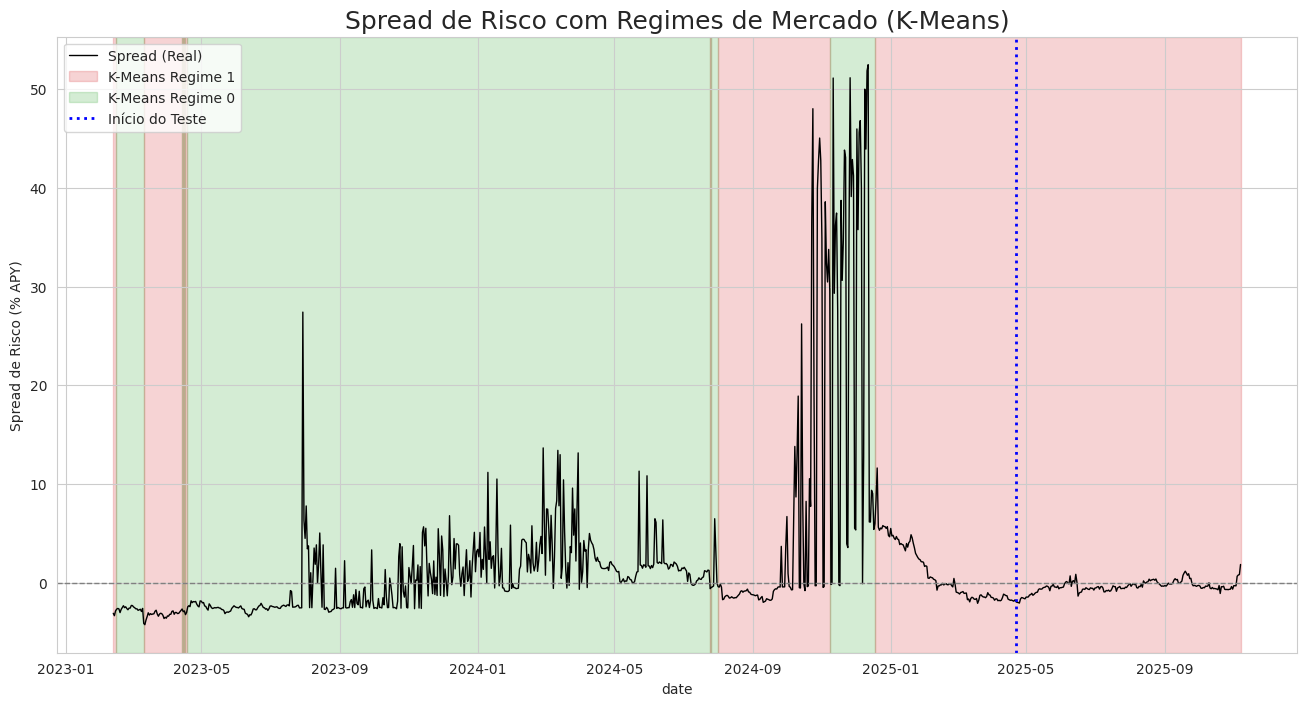

In [497]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# --- 6. Clusterização por Regimes (Método K-MEANS) ---

# Quantos regimes queremos? (2 é mais seguro para começar)
N_CLUSTERS = 2

print(f"=== MÉTODO 3: Clusterização por K-Means ({N_CLUSTERS} Regimes) ===\n")

# 1. Preparar os dados para o K-Means (é sensível à escala)
# Usaremos *APENAS* as features externas para definir os regimes, 
# para que o K-Means não "trapaceie" usando os Lags do Spread.
# (Se quiser usar todas, basta usar X_train e X_test)
features_cluster = [
    'X_Aave_Utilization', 'totalValueLockedUSD', 'X_USDC_Depeg_Risk', 'X_VIX',
    'X_BTC_Vol_7D', 'X_ETH_Vol_7D', 'X_ETH_Returns', 'X_DGS2',
    'X_BTC_Ret', 'X_Gas_Change', 'VIX_MA_7D', 'Gas_MA_7D'
]
# Garantir que só usamos features que existem
features_cluster = [f for f in features_cluster if f in X_train.columns]


scaler_kmeans = StandardScaler()
X_train_kmeans_scaled = scaler_kmeans.fit_transform(X_train[features_cluster])
X_test_kmeans_scaled = scaler_kmeans.transform(X_test[features_cluster])


# 2. "Fit": Aprender os clusters *APENAS* no treino
print(f"--- Definindo Regimes (TREINO) com K-Means (k={N_CLUSTERS}) ---")
kmeans = KMeans(n_clusters=N_CLUSTERS, random_state=42, n_init=10)
train_regimes = kmeans.fit_predict(X_train_kmeans_scaled)

# 3. "Transform": Aplicar os clusters *aprendidos no treino* aos dados de teste
print("\n--- Aplicando Regimes (TESTE) ---")
test_regimes = kmeans.predict(X_test_kmeans_scaled)


# --- 4. Análise dos Regimes Encontrados ---
print("\n--- Análise dos Regimes de TREINO ---")
X_train_analysis = X_train.copy()
X_train_analysis['Regime'] = train_regimes
print(X_train_analysis.groupby('Regime')[features_cluster].mean().T.to_markdown())

print("\n--- Análise dos Regimes de TESTE ---")
X_test_analysis = X_test.copy()
X_test_analysis['Regime'] = test_regimes
print(X_test_analysis.groupby('Regime')[features_cluster].mean().T.to_markdown())

# Plotar a distribuição para visualização (similar ao anterior)
df_plot = df.copy()
df_plot.loc[X_train.index, 'Regime'] = train_regimes
df_plot.loc[X_test.index, 'Regime'] = test_regimes
df_plot = df_plot.dropna(subset=['Regime']) # Remover NaNs se houver
df_plot['Regime'] = df_plot['Regime'].astype(int)

plt.figure(figsize=(16, 8))
colors = ['#2ca02c', '#d62728', '#ff7f0e'] # Verde, Vermelho, Laranja
regime_names = [f'K-Means Regime {i}' for i in range(N_CLUSTERS)]

ax = sns.lineplot(data=df_plot, x=df_plot.index, y='Y_Target_Spread', label='Spread (Real)', color='black', linewidth=1.0)
ax.axhline(0, ls='--', color='grey', lw=1)

plotted_labels = set()
start_date = df_plot.index[0]
current_regime = df_plot.iloc[0]['Regime']

for i in range(1, len(df_plot)):
    row = df_plot.iloc[i]
    if row['Regime'] != current_regime:
        end_date = df_plot.index[i]
        label = regime_names[int(current_regime)] if regime_names[int(current_regime)] not in plotted_labels else None        
        ax.axvspan(start_date, end_date, color=colors[int(current_regime)], alpha=0.2, label=label, zorder=0)
        plotted_labels.add(regime_names[int(current_regime)])        
        start_date = end_date
        current_regime = row['Regime']

# Último bloco
label = regime_names[int(current_regime)] if regime_names[int(current_regime)] not in plotted_labels else None
ax.axvspan(start_date, df_plot.index[-1], color=colors[int(current_regime)], alpha=0.2, label=label, zorder=0)

# Linha de Divisão Treino/Teste
split_date = X_test.index[0]
ax.axvline(split_date, color='blue', linestyle=':', linewidth=2, label='Início do Teste')

ax.legend(loc='upper left')
plt.title('Spread de Risco com Regimes de Mercado (K-Means)', fontsize=18)
plt.ylabel('Spread de Risco (% APY)')
plt.show()

[]

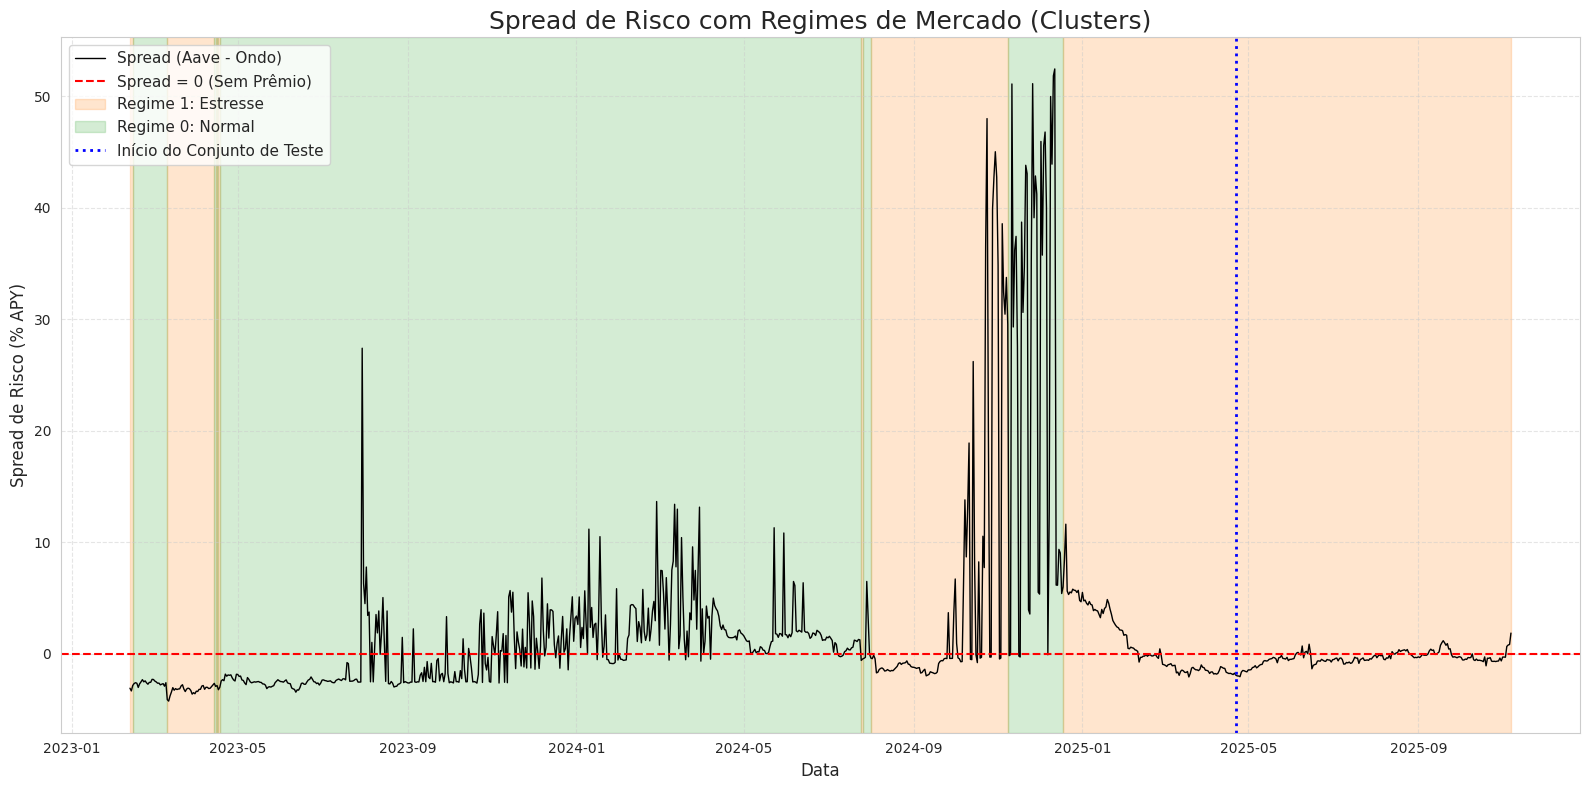

In [ ]:
import matplotlib.dates as mdates

# --- 1. Preparar os Dados para Plotagem ---
# (O restante desta seção está correto)
df_plot = df.copy()
train_dates = X_train.index
test_dates = X_test.index
df_plot.loc[train_dates, 'Regime'] = train_regimes
df_plot.loc[test_dates, 'Regime'] = test_regimes
df_plot['Regime'] = df_plot['Regime'].astype(int)

# --- 2. Criar o Gráfico de Base (Spread) ---
plt.figure(figsize=(16, 8))
ax = sns.lineplot(
    data=df_plot,
    x=df_plot.index,
    y='Y_Target_Spread',
    label='Spread (Aave - Ondo)',
    color='black',
    linewidth=1.0
)
ax.axhline(0, ls='--', color='red', lw=1.5, label='Spread = 0 (Sem Prêmio)')

# --- 3. Adicionar Sombreamento dos Regimes (axvspan) ---
colors = ['#2ca02c', '#ff7f0e', '#d62728'] 
regime_names = ['Regime 0: Normal', 'Regime 1: Estresse', 'Regime 2: Crise']
plotted_labels = set() 

start_date = df_plot.index[0]
current_regime = df_plot.iloc[0]['Regime']

# Iterar por todas as linhas para encontrar mudanças de regime
for i in range(1, len(df_plot)):
    row = df_plot.iloc[i]
    
    # Se o regime mudou, desenhamos o bloco anterior
    if row['Regime'] != current_regime:
        
        # --- CORREÇÃO 1 AQUI ---
        # Usar df_plot.index[i] para obter o timestamp, não row.index
        end_date = df_plot.index[i]
        
        label = regime_names[int(current_regime)] if regime_names[int(current_regime)] not in plotted_labels else None        
        ax.axvspan(
            start_date,
            end_date,
            color=colors[int(current_regime)],
            alpha=0.2,
            label=label,
            zorder=0 
        )
        
        plotted_labels.add(regime_names[int(current_regime)])        

        # --- CORREÇÃO 2 AQUI ---
        # Resetar o start_date para o timestamp atual
        start_date = end_date
        current_regime = row['Regime']

# --- CORREÇÃO 3 AQUI (Erro de Sintaxe da última vez) ---
# A linha 72 estava fundida com a 73
# 1. Definir o label para o último bloco
label = regime_names[int(current_regime)] if regime_names[int(current_regime)] not in plotted_labels else None

# 2. Desenhar o último bloco (que vai até o final dos dados)
ax.axvspan(
    start_date,
    df_plot.index[-1],
    color=colors[int(current_regime)],
    alpha=0.2,
    label=label,
    zorder=0
)


# --- 4. Adicionar Linha de Divisão Treino/Teste ---
split_date = X_test.index[0]
ax.axvline(
    split_date,
    color='blue',
    linestyle=':',
    linewidth=2,
    label='Início do Conjunto de Teste'
)


# --- 5. Formatação Final ---
plt.title('Spread de Risco com Regimes de Mercado (Clusters)', fontsize=18)
plt.ylabel('Spread de Risco (% APY)', fontsize=12)
plt.xlabel('Data', fontsize=12)

# Melhorar a legenda
handles, labels = ax.get_legend_handles_labels()
# Reordenar para uma ordem lógica
# A ordem pode precisar de ajuste dependendo de quais regimes aparecem primeiro
try:
    # Tenta usar a ordem customizada anterior
    order = [0, 1, 4, 2, 3, 5] 
    ax.legend([handles[idx] for idx in order], [labels[idx] for idx in order], loc='upper left', fontsize=11)
except IndexError:
    # Fallback caso a ordem customizada falhe (ex: se um regime não estiver no plot)
    ax.legend(loc='upper left', fontsize=11)

plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.plot()

In [499]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import xgboost as xgb

In [500]:
# Treinar modelos por regime
regime_models = {}
regime_predictions = np.zeros(len(X_test))
regime_metrics = {}

print("\n--- Treinando Modelos por Regime ---")
for regime_id in [0, 1, 2]:
    # Dados de treino para este regime
    train_mask = train_regimes == regime_id
    
    if np.sum(train_mask) > 10:  # Mínimo de amostras
        print(f"\nTreinando Modelo para Regime {regime_id} (Amostras: {np.sum(train_mask)})...")
        X_regime_train = X_train[train_mask]
        y_regime_train = Y_train[train_mask]
        
        # Treinar LASSO para o regime
        model = LassoCV(alphas=np.logspace(-4, 0, 50), cv=3, random_state=42)
        model.fit(X_regime_train, y_regime_train)
        regime_models[regime_id] = model
        
        # Prever para amostras de teste no mesmo regime
        test_mask = test_regimes == regime_id
        if np.sum(test_mask) > 0:
            X_regime_test = X_test[test_mask]
            y_regime_test = Y_test[test_mask]
            
            y_pred_regime = model.predict(X_regime_test)
            regime_predictions[test_mask] = y_pred_regime
            
            # Calcular métricas por regime
            mae_regime = mean_absolute_error(y_regime_test, y_pred_regime)
            rmse_regime = np.sqrt(mean_squared_error(y_regime_test, y_pred_regime))
            r2_regime = r2_score(y_regime_test, y_pred_regime)
            
            regime_metrics[regime_id] = {
                'samples': np.sum(test_mask),
                'mae': mae_regime,
                'rmse': rmse_regime,
                'r2': r2_regime
            }
            
            print(f"Regime {regime_id} - Amostras teste: {np.sum(test_mask)}")
            print(f"MAE: {mae_regime:.4f}, RMSE: {rmse_regime:.4f}, R²: {r2_regime:.4f}")
        else:
            print(f"Regime {regime_id} - Sem amostras de teste.")
    else:
        print(f"\nRegime {regime_id} - Pulado (amostras de treino insuficientes: {np.sum(train_mask)})")



--- Treinando Modelos por Regime ---

Treinando Modelo para Regime 0 (Amostras: 537)...
Regime 0 - Sem amostras de teste.

Treinando Modelo para Regime 1 (Amostras: 263)...
Regime 1 - Amostras teste: 200
MAE: 0.6615, RMSE: 0.8512, R²: -1.1929

Regime 2 - Pulado (amostras de treino insuficientes: 0)


/home/renzo/Documents/GitHub/6-datathon-fgv-eesp/datathon/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.220e+01, tolerance: 4.412e+00
  model = cd_fast.enet_coordinate_descent_gram(
/home/renzo/Documents/GitHub/6-datathon-fgv-eesp/datathon/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.059e+00, tolerance: 3.078e-02
  model = cd_fast.enet_coordinate_descent_gram(
/home/renzo/Documents/GitHub/6-datathon-fgv-eesp/datathon/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want


=== PERFORMANCE GERAL (Regimes) === 
(Apenas sobre amostras de teste com regimes mapeados)
MAE: 0.6615
RMSE: 0.8512
R²: -1.1929


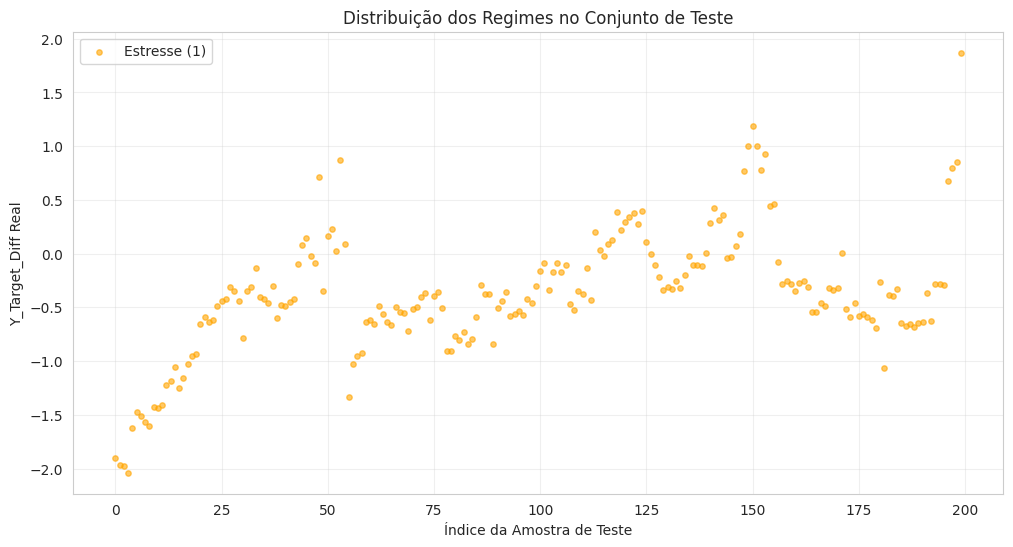

In [501]:

# Métricas gerais
# Nota: A métrica geral pode ser enganosa se alguns regimes não tiverem previsões
valid_test_mask = (test_regimes == 0) | (test_regimes == 1) | (test_regimes == 2)
overall_mae = mean_absolute_error(Y_test[valid_test_mask], regime_predictions[valid_test_mask])
overall_rmse = np.sqrt(mean_squared_error(Y_test[valid_test_mask], regime_predictions[valid_test_mask]))
overall_r2 = r2_score(Y_test[valid_test_mask], regime_predictions[valid_test_mask])

print(f"\n=== PERFORMANCE GERAL (Regimes) === \n(Apenas sobre amostras de teste com regimes mapeados)")
print(f"MAE: {overall_mae:.4f}")
print(f"RMSE: {overall_rmse:.4f}")
print(f"R²: {overall_r2:.4f}")

# Visualizar regimes
plt.figure(figsize=(12, 6))
colors = ['green', 'orange', 'red']
regime_names = ['Normal (0)', 'Estresse (1)', 'Crisis (2)']

for regime_id in [0, 1, 2]:
    mask = test_regimes == regime_id
    if np.sum(mask) > 0:
        # Usar o índice de X_test para obter a posição correta
        test_indices = np.where(mask)[0]
        plt.scatter(test_indices, Y_test[mask], 
                   c=colors[regime_id], label=regime_names[regime_id], alpha=0.6, s=15)

plt.xlabel('Índice da Amostra de Teste')
plt.ylabel('Y_Target_Diff Real')
plt.title('Distribuição dos Regimes no Conjunto de Teste')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [502]:

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, median_absolute_error

def calculate_metrics(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    medae = median_absolute_error(y_true, y_pred)
    return {'Model': model_name, 'MAE': mae, 'RMSE': rmse, 'R2': r2, 'MedAE': medae}


In [503]:
results = {}

# --- 4. Modelo 1: Baseline (O "Ingênuo") ---
# A previsão de "hoje" é o valor de "ontem".
y_pred_baseline = Y_test.shift(1)
# O primeiro valor do teste não tem "ontem", então usamos o último valor do treino.
y_pred_baseline.iloc[0] = Y_train.iloc[-1]

# Calcular Erros
mae_baseline = mean_absolute_error(Y_test, y_pred_baseline)
rmse_baseline = np.sqrt(mean_squared_error(Y_test, y_pred_baseline))
results['Baseline'] = {'MAE': mae_baseline, 'RMSE': rmse_baseline}


In [504]:
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
# NOVAS IMPORTAÇÕES
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit

# --- 1. Inicializar Dicionários para Armazenamento ---
trained_regime_models = {
    'Lasso_Por_Regime': {},
    'RF_Por_Regime': {},
    'XGB_Por_Regime': {}
}
lasso_regime_preds = np.zeros(len(X_test))
rf_regime_preds = np.zeros(len(X_test))
xgb_regime_preds = np.zeros(len(X_test))
all_regime_metrics = {}

# --- 2. Definir Validação Cruzada e Grids de Parâmetros ---
# Usar TimeSeriesSplit para CV em séries temporais
cv_ts = TimeSeriesSplit(n_splits=3)

# Grids de parâmetros (pequenos para rodar mais rápido)
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [1, 2, 3, 5, 10, None], # None = sem limite
    'min_samples_leaf': [1, 2, 3, 5]
}

param_grid_rf = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 1, 2, 3, 5, 10],  # None permite que cresça até folhas puras
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', 0.8]  # Número de features para split
}

param_grid_xgb = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [1, 2, 3, 5, 7, 10],
    'learning_rate': [0.1]
}


print("--- Treinando MÚLTIPLOS Modelos por Regime (com GridSearch) ---")

# --- 3. Loop principal por Regime ---
for regime_id in [0, 1, 2]:
    print(f"\n--- Processando REGIME {regime_id} ---")
    
    train_mask = train_regimes == regime_id
    test_mask = test_regimes == regime_id
    
    if np.sum(train_mask) < 10:
        print(f"Regime {regime_id} - Pulado (amostras de treino insuficientes: {np.sum(train_mask)})")
        continue
        
    has_test_data = np.sum(test_mask) > 0
    if not has_test_data and np.sum(train_mask) > 0:
        print(f"Regime {regime_id} - Treinando, mas sem amostras de teste para prever.")

    X_regime_train = X_train[train_mask]
    y_regime_train = Y_train[train_mask]
    
    if has_test_data:
        X_regime_test = X_test[test_mask]
        y_regime_test = Y_test[test_mask]

    # --- 3a. Treinar LASSO (com Scaler e TimeSeriesSplit CV) ---
    print(f"Treinando Lasso para Regime {regime_id}...")
    scaler_lasso = StandardScaler()
    X_regime_train_scaled = scaler_lasso.fit_transform(X_regime_train)
    
    # LassoCV já faz tuning, apenas trocamos o 'cv' para TimeSeriesSplit
    model_lasso = LassoCV(alphas=np.logspace(-4, 0, 30), cv=cv_ts, random_state=42, max_iter=5000, n_jobs=-1) 
    model_lasso.fit(X_regime_train_scaled, y_regime_train)
    trained_regime_models['Lasso_Por_Regime'][regime_id] = model_lasso
    
    if has_test_data:
        X_regime_test_scaled = scaler_lasso.transform(X_regime_test)
        y_pred_lasso = model_lasso.predict(X_regime_test_scaled)
        lasso_regime_preds[test_mask] = y_pred_lasso
        all_regime_metrics[f'Lasso_R{regime_id}'] = calculate_metrics(y_regime_test, y_pred_lasso, f'Lasso_R{regime_id}')
        print(f"Lasso R{regime_id} (Alpha={model_lasso.alpha_:.4f}) Test R²: {all_regime_metrics[f'Lasso_R{regime_id}']['R2']:.4f}")

    # --- 3b. Treinar RANDOM FOREST (com GridSearchCV) ---
    print(f"Treinando RandomForest (GridSearch) para Regime {regime_id}...")
    grid_rf = GridSearchCV(
        estimator=RandomForestRegressor(random_state=42, n_jobs=-1),
        param_grid=param_grid_rf,
        cv=cv_ts, # Usando TimeSeriesSplit
        scoring='neg_root_mean_squared_error', # Otimizar por RMSE
        n_jobs=-1
    )
    grid_rf.fit(X_regime_train, y_regime_train)
    model_rf = grid_rf.best_estimator_ # Salva o melhor modelo
    trained_regime_models['RF_Por_Regime'][regime_id] = model_rf
    
    if has_test_data:
        y_pred_rf = model_rf.predict(X_regime_test)
        rf_regime_preds[test_mask] = y_pred_rf
        all_regime_metrics[f'RF_R{regime_id}'] = calculate_metrics(y_regime_test, y_pred_rf, f'RF_R{regime_id}')
        print(f"RF R{regime_id} (Best Params: {grid_rf.best_params_}) Test R²: {all_regime_metrics[f'RF_R{regime_id}']['R2']:.4f}")

    # --- 3c. Treinar XGBOOST (com GridSearchCV) ---
    print(f"Treinando XGBoost (GridSearch) para Regime {regime_id}...")
    grid_xgb = GridSearchCV(
        estimator=xgb.XGBRegressor(random_state=42, n_jobs=-1),
        param_grid=param_grid_xgb,
        cv=cv_ts, # Usando TimeSeriesSplit
        scoring='neg_root_mean_squared_error',
        n_jobs=-1
    )
    grid_xgb.fit(X_regime_train, y_regime_train)
    model_xgb = grid_xgb.best_estimator_ # Salva o melhor modelo
    trained_regime_models['XGB_Por_Regime'][regime_id] = model_xgb
    
    if has_test_data:
        y_pred_xgb = model_xgb.predict(X_regime_test)
        xgb_regime_preds[test_mask] = y_pred_xgb
        all_regime_metrics[f'XGB_R{regime_id}'] = calculate_metrics(y_regime_test, y_pred_xgb, f'XGB_R{regime_id}')
        print(f"XGB R{regime_id} (Best Params: {grid_xgb.best_params_}) Test R²: {all_regime_metrics[f'XGB_R{regime_id}']['R2']:.4f}")

print("\n--- Treinamento por Regime Concluído ---")

--- Treinando MÚLTIPLOS Modelos por Regime (com GridSearch) ---

--- Processando REGIME 0 ---
Regime 0 - Treinando, mas sem amostras de teste para prever.
Treinando Lasso para Regime 0...
Treinando RandomForest (GridSearch) para Regime 0...
Treinando XGBoost (GridSearch) para Regime 0...

--- Processando REGIME 1 ---
Treinando Lasso para Regime 1...
Lasso R1 (Alpha=0.0001) Test R²: -1.1802
Treinando RandomForest (GridSearch) para Regime 1...
RF R1 (Best Params: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}) Test R²: 0.6177
Treinando XGBoost (GridSearch) para Regime 1...
XGB R1 (Best Params: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}) Test R²: 0.2632

--- Processando REGIME 2 ---
Regime 2 - Pulado (amostras de treino insuficientes: 0)

--- Treinamento por Regime Concluído ---


--- Ranking de Performance GERAL (Ordenado por RMSE) ---
| Model            |      MAE |     RMSE |        R2 |     MedAE |
|:-----------------|---------:|---------:|----------:|----------:|
| Baseline         | 0.169138 | 0.271797 |  0.776432 | 0.0976632 |
| RF_Por_Regime    | 0.261402 | 0.355408 |  0.617726 | 0.204765  |
| XGB_Por_Regime   | 0.300899 | 0.493429 |  0.263166 | 0.195658  |
| Lasso_Por_Regime | 0.749009 | 0.848762 | -1.18017  | 0.727976  |

Top 3 Modelos selecionados para visualização: ['Baseline', 'RF_Por_Regime', 'XGB_Por_Regime']


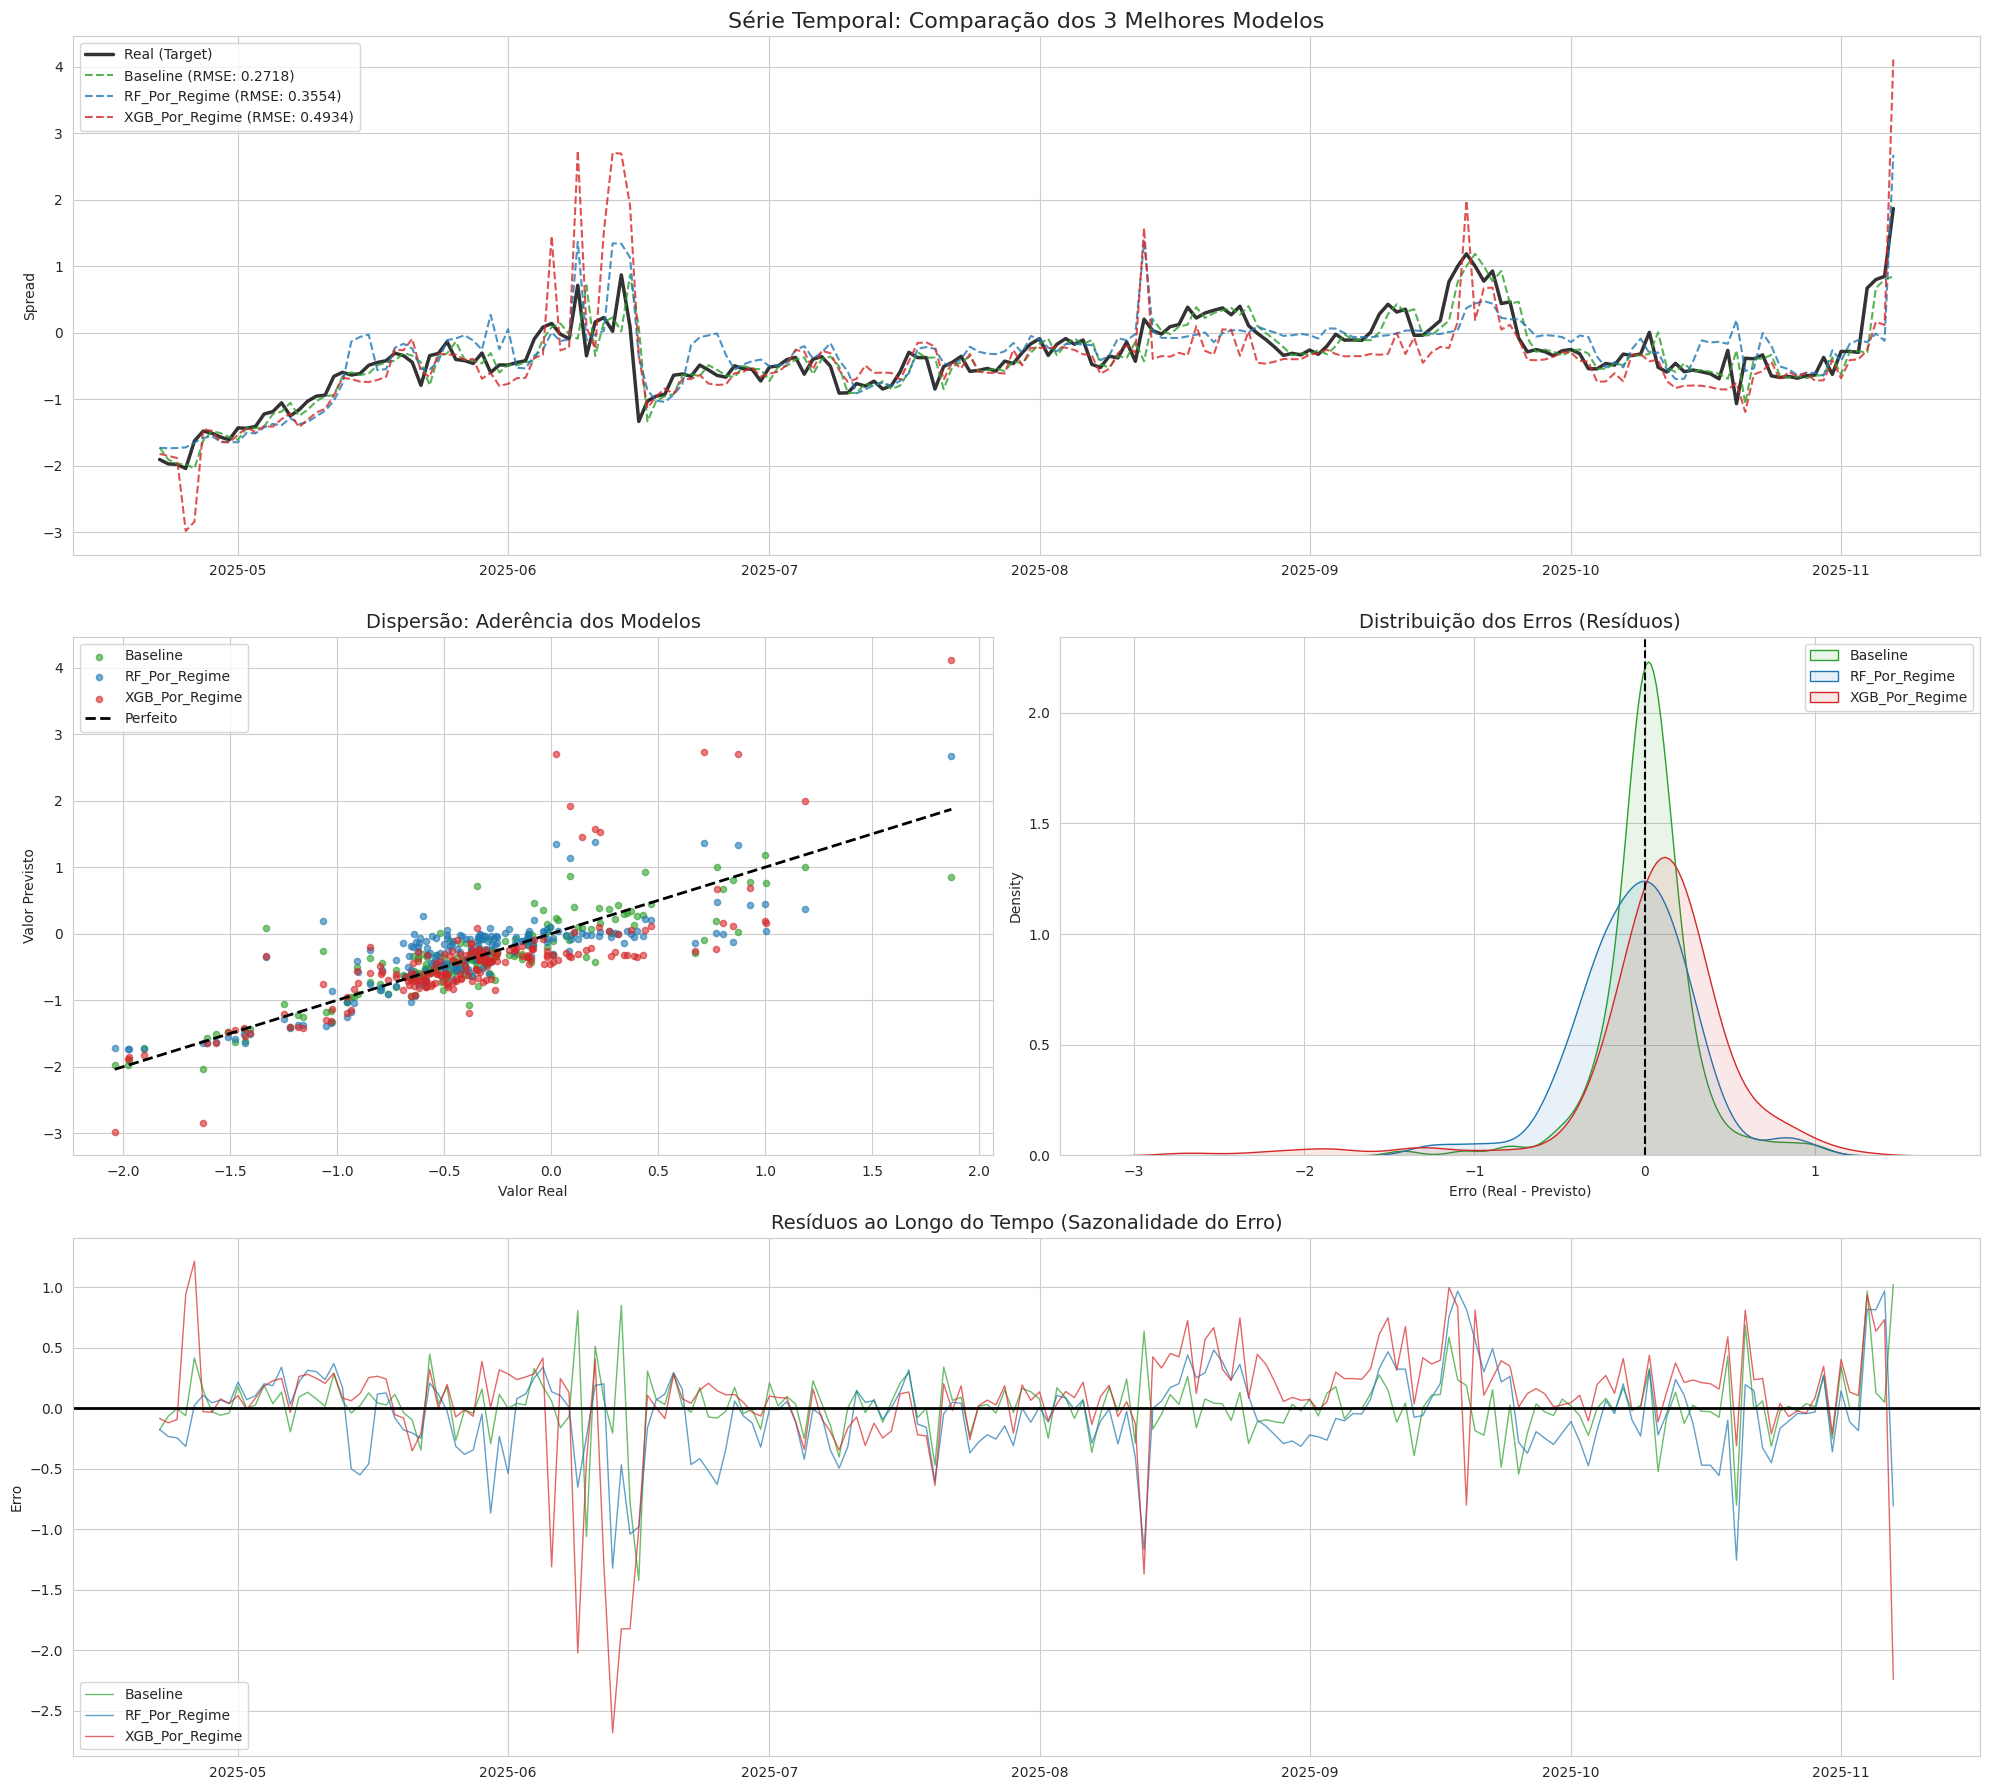

In [505]:
# ==============================================================================
# 1. CONSOLIDAÇÃO DE TODAS AS PREVISÕES
# ==============================================================================
# Dicionário para guardar todas as previsões
model_predictions = {}

# --- Modelos POR REGIME (da Célula 133) ---
# (Certifique-se de que a célula 133 (ID 2ad3613c) foi executada)
try:
    model_predictions['Lasso_Por_Regime'] = lasso_regime_preds
    model_predictions['RF_Por_Regime'] = rf_regime_preds
    model_predictions['XGB_Por_Regime'] = xgb_regime_preds
except NameError as e:
    print(f"Variáveis de regime não encontradas. Rode a Célula 133 (2ad3613c) primeiro. Erro: {e}")

# --- Modelos GLOBAIS (da Célula 133 - id: b450b255) ---
# (Certifique-se de que a célula 133 (ID b450b255) foi executada)
try:
    model_predictions['Baseline'] = y_pred_baseline
except NameError:
    pass 

# --- CORREÇÃO: Remova ou comente estas seções ---
# Estas linhas estavam causando o erro ao pegar variáveis locais da célula 133.
# try:
#     model_predictions['XGBoost_Global'] = y_pred_xgb 
# except NameError:
#     pass
#
# try:
#     model_predictions['RandomForest_Global'] = y_pred_rf
# except NameError:
#     pass
#
# try:
#     model_predictions['LASSO_Global_Scaled'] = y_pred_lasso
# except NameError:
#     pass

# ==============================================================================
# 2. CÁLCULO DE MÉTRICAS E RANKING (Comparação Geral)
# ==============================================================================

# Calcular métricas para todos os modelos disponíveis
metrics_list = []
# Esta máscara está correta e tem 202 elementos
valid_test_mask = (test_regimes == 0) | (test_regimes == 1) | (test_regimes == 2)

for name, preds in model_predictions.items():
    # Agora 'preds' (ex: lasso_regime_preds) também terá 202 elementos
    metrics_list.append(calculate_metrics(Y_test[valid_test_mask], preds[valid_test_mask], name))

# Criar DataFrame e ordenar pelo menor RMSE (o melhor modelo fica no topo)
df_metrics = pd.DataFrame(metrics_list).sort_values(by='RMSE', ascending=True)

# Selecionar os nomes dos 3 melhores modelos para plotagem
top_3_models = df_metrics.head(3)['Model'].tolist()

print("--- Ranking de Performance GERAL (Ordenado por RMSE) ---")
print(df_metrics.to_markdown(index=False))
print(f"\nTop 3 Modelos selecionados para visualização: {top_3_models}")

# ==============================================================================
# 3. VISUALIZAÇÃO COMPARATIVA (TOP 3)
# ==============================================================================
sns.set_style("whitegrid")
fig = plt.figure(figsize=(20, 18))
colors = ['#2ca02c', '#1f77b4', '#d62728'] # Verde, Azul, Vermelho

# --- Gráfico A: Série Temporal (Real vs Previsto) ---
ax1 = plt.subplot(3, 1, 1)
ax1.plot(Y_test.index, Y_test, label='Real (Target)', color='black', linewidth=2.5, alpha=0.8)

for i, model_name in enumerate(top_3_models):
    preds = model_predictions[model_name]
    ax1.plot(Y_test.index, preds, label=f'{model_name} (RMSE: {df_metrics[df_metrics.Model==model_name].RMSE.values[0]:.4f})', 
             linestyle='--', alpha=0.8, color=colors[i])

ax1.set_title('Série Temporal: Comparação dos 3 Melhores Modelos', fontsize=16)
ax1.set_ylabel('Spread')
ax1.legend(loc='upper left')

# --- Gráfico B: Dispersão (Real vs Previsto) ---
ax2 = plt.subplot(3, 2, 3)
for i, model_name in enumerate(top_3_models):
    preds = model_predictions[model_name]
    ax2.scatter(Y_test, preds, alpha=0.6, label=model_name, color=colors[i], s=20)

# Linha de perfeição
min_val, max_val = Y_test.min(), Y_test.max()
ax2.plot([min_val, max_val], [min_val, max_val], 'k--', lw=2, label='Perfeito')
ax2.set_title('Dispersão: Aderência dos Modelos', fontsize=14)
ax2.set_xlabel('Valor Real')
ax2.set_ylabel('Valor Previsto')
ax2.legend()

# --- Gráfico C: Distribuição dos Resíduos (KDE) ---
ax3 = plt.subplot(3, 2, 4)
for i, model_name in enumerate(top_3_models):
    residuals = Y_test - model_predictions[model_name]
    sns.kdeplot(residuals, label=model_name, fill=True, alpha=0.1, color=colors[i], ax=ax3)

ax3.axvline(0, color='black', linestyle='--')
ax3.set_title('Distribuição dos Erros (Resíduos)', fontsize=14)
ax3.set_xlabel('Erro (Real - Previsto)')
ax3.legend()

# --- Gráfico D: Resíduos ao Longo do Tempo ---
ax4 = plt.subplot(3, 1, 3)
for i, model_name in enumerate(top_3_models):
    residuals = Y_test - model_predictions[model_name]
    ax4.plot(Y_test.index, residuals, label=model_name, alpha=0.7, linewidth=1, color=colors[i])

ax4.axhline(0, color='black', linestyle='-', linewidth=2)
ax4.set_title('Resíduos ao Longo do Tempo (Sazonalidade do Erro)', fontsize=14)
ax4.set_ylabel('Erro')
ax4.legend()

plt.tight_layout()
plt.show()

In [506]:
# Ver quais features o LASSO seleciona
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'coef': model_lasso.coef_,
    'abs_coef': np.abs(model_lasso.coef_)
}).sort_values('abs_coef', ascending=False)

print("Features mais importantes pelo LASSO:")
print(feature_importance.head(10))

Features mais importantes pelo LASSO:
               feature      coef  abs_coef
4                Lag_1  4.847360  4.847360
2         Spread_MA_7D  4.381613  4.381613
7                Lag_2 -4.355060  4.355060
0   X_Aave_Utilization  1.314101  1.314101
1         Spread_MA_3D  1.068915  1.068915
8            VIX_MA_7D  0.442369  0.442369
5               X_DGS2  0.338648  0.338648
3  totalValueLockedUSD -0.221197  0.221197
9                X_VIX -0.091978  0.091978
6            Gas_MA_7D -0.010469  0.010469


# Cluster 

In [507]:
"""
def temporal_cluster_validation(X_train, y_train, X_test, y_test):
    # Clusterização SEPARADA
    kmeans_train = KMeans(n_clusters=3)
    train_clusters = kmeans_train.fit_predict(X_train)
    
    # Teste usa clusters do treino (não refaz clusterização)
    test_clusters = kmeans_train.predict(X_test)
    
    # Modelos treinados apenas com dados de treino
    models = {}
    for cluster_id in np.unique(train_clusters):
        train_mask = train_clusters == cluster_id
        model = LassoCV()
        model.fit(X_train[train_mask], y_train[train_mask])
        models[cluster_id] = model
    
    return models, test_clusters
"""

'\ndef temporal_cluster_validation(X_train, y_train, X_test, y_test):\n    # Clusterização SEPARADA\n    kmeans_train = KMeans(n_clusters=3)\n    train_clusters = kmeans_train.fit_predict(X_train)\n\n    # Teste usa clusters do treino (não refaz clusterização)\n    test_clusters = kmeans_train.predict(X_test)\n\n    # Modelos treinados apenas com dados de treino\n    models = {}\n    for cluster_id in np.unique(train_clusters):\n        train_mask = train_clusters == cluster_id\n        model = LassoCV()\n        model.fit(X_train[train_mask], y_train[train_mask])\n        models[cluster_id] = model\n\n    return models, test_clusters\n'